Usecase test 2: Which articles contain data regarding the gene KLF9, the top downregulated transcription factor discussed in https://doi.org/10.1038%2Fs41586-022-05377-7 (PMID36323788), one of the largest examples of transcriptomic analysis on ASD samples (and included in our KG).

1. Query to find all articles containing reference to KLF9 in the supporting data (Ensembl ID ENSG00000119138) 

In [73]:
import rdflib

#filename = "test_graph.nt"
filename = "cleaned_maingraph.nt"
g = rdflib.Graph()
g.parse(filename, format="nt")


KeyboardInterrupt: 

In [31]:
gene_query = """
    PREFIX EDAM: <http://edamontology.org/>
    PREFIX RDF: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX DCT: <http://purl.org/dc/terms/>
    PREFIX BIOLINK: <https://w3id.org/biolink/vocab/>
    PREFIX ENSEMBL: <http://identifiers.org/ensembl/>
    PREFIX NCBIGENE: <http://identifiers.org/ncbigene/>
    
    SELECT DISTINCT ?doi
    WHERE {
        ?doi RDF:type  .
        ?doi (<>|!<>)* ?object .
        FILTER(CONTAINS(STR(?object), "CHN1")) .
        FILTER(REGEX(STR(?doi), "^https://pubmed.ncbi.nlm.nih.gov/"))
    }
    }
"""
#https://pubmed.ncbi.nlm.nih.gov/
# Execute the query
result = g.query(gene_query)

# Print results
for row in result:
    print(row.gene)

#results = g.query(test_query)
#for row in results:
#    print(f"Article {row.pmid} includes gene: {row.all_genes}")
#    print("---")

KeyboardInterrupt: 

In [51]:
query = """
PREFIX EDAM: <http://edamontology.org/>
PREFIX RDF: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX DCT: <http://purl.org/dc/terms/>
PREFIX BIOLINK: <https://w3id.org/biolink/vocab/>
PREFIX ENSEMBL: <http://identifiers.org/ensembl/>
PREFIX NCBIGENE: <http://identifiers.org/ncbigene/>
PREFIX MONARCH: <https://monarchinitiative.org/>

SELECT ?subject
WHERE {
  ?subject BIOLINK:Gene MONARCH:HGNC:1123
}
"""

# Execute the query
results = g.query(query)

def find_root_and_path(g, node, visited=None):
    if visited is None:
        visited = set()
    visited.add(node)
    parents = list(g.subjects(predicate=None, object=node))
    if not parents:
        return node, []
    for parent in parents:
        if parent not in visited:
            root, path = find_root_and_path(g, parent, visited)
            path.append((parent, None, node))  # Store the triple without the predicate
            return root, path
    return node, []

# Store genes and the corresponding paths to their roots
root_data = defaultdict(list)

for row in results:
    gene = "https://monarchinitiative.org/HGNC:1123"
    root, path = find_root_and_path(g, gene)
    for (subj, pred, obj) in path:
        for predicate in g.predicates(subject=subj, object=obj):
            root_data[root].append((subj, predicate, obj))

# Print out the root data
for root, triples in root_data.items():
    print(f"Root: {root}")
    for triple in triples:
        print(f"  {triple}")

# Create a subgraph with the relevant triples
subgraph = rdflib.Graph()
for triples in root_data.values():
    for triple in triples:
        subgraph.add(triple)
print("complete")

complete


In [68]:
query = """
PREFIX MONARCH: <https://monarchinitiative.org/>
PREFIX RDF: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX DCT: <http://purl.org/dc/terms/>

SELECT ?pmid
WHERE {
  ?pmid (<>|!<>) ?gene .
  ?pmid DCT:identifier ?object.
  ?subject BIOLINK:Gene ?gene
  FILTER(CONTAINS(STR(?gene), "HGNC:1123")
}
"""

results = g.query(query)
for row in results:
    print(row.pmid)


Extended Query Results:


In [53]:


def find_root_and_path(g, node, visited=None):
    if visited is None:
        visited = set()
    visited.add(node)
    parents = list(g.subjects(predicate=None, object=node))
    if not parents:
        return node, []
    for parent in parents:
        if parent not in visited:
            root, path = find_root_and_path(g, parent, visited)
            path.append((parent, None, node))  # Store the triple without the predicate
            return root, path
    return node, []

# Store genes and the corresponding paths to their roots
root_data = defaultdict(list)

for row in results:
    subject = row.subject
    root, path = find_root_and_path(g, gene)
    for (subj, pred, obj) in path:
        for predicate in g.predicates(subject=subj, object=obj):
            root_data[root].append((subj, predicate, obj))

# Print out the root data
for root, triples in root_data.items():
    print(f"Root: {root}")
    for triple in triples:
        print(f"  {triple}")

# Create a subgraph with the relevant triples
subgraph = rdflib.Graph()
for triples in root_data.values():
    for triple in triples:
        subgraph.add(triple)
print("complete")

complete


In [35]:
query = """
    PREFIX EDAM: <http://edamontology.org/>
    PREFIX RDF: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX DCT: <http://purl.org/dc/terms/>
    PREFIX BIOLINK: <https://w3id.org/biolink/vocab/>
    PREFIX ENSEMBL: <http://identifiers.org/ensembl/>
    PREFIX NCBIGENE: <http://identifiers.org/ncbigene/>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

    SELECT ?subject ?biolink_gene ?biolink_symbol ?ensembl_gene ?ncbi_gene 
    WHERE {
        ?subject ?p ?gene .
        FILTER (?gene IN ("HGNC:1123", "KLF9", "ENSG00000119138"))
        OPTIONAL { ?subject BIOLINK:Gene ?biolink_gene }
        OPTIONAL { ?subject BIOLINK:symbol ?biolink_symbol }
        OPTIONAL { ?subject ENSEMBL:id ?ensembl_gene }
        OPTIONAL { ?subject NCBIGENE:id ?ncbi_gene }
        FILTER(BOUND(?biolink_gene) || BOUND(?biolink_symbol) || BOUND(?ensembl_gene) || BOUND(?ncbi_gene))
        
    }
"""

results = g.query(query)

In [77]:

import networkx as nx

filename = "genesubgraph.nt"
sg = rdflib.Graph()
sg.parse(filename, format="nt")


G = nx.DiGraph()
for s, p, o in sg:
    G.add_edge(str(s), str(o), relation=str(p))

nx.write_gexf(G, "subgraph5.gexf")

2. Manual check of the papers?

Is the gene also discussed in these papers?

Usecase test 3: Can links be found relating to predispositions for ASD co-morbidities?

1. Take count of genes cited in the data across all articles highlighting the most cited overall (by most connections)

In [21]:
import rdflib

#filename = "cleaned_maingraph.nt"
#g = rdflib.Graph()
#g.parse(filename, format="nt")
count_query = """
    PREFIX EDAM: <http://edamontology.org/>
    PREFIX RDF: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX DCT: <http://purl.org/dc/terms/>
    PREFIX BIOLINK: <https://w3id.org/biolink/vocab/>
    PREFIX ENSEMBL: <http://identifiers.org/ensembl/>
    PREFIX NCBIGENE: <http://identifiers.org/ncbigene/>

    SELECT ?gene (COUNT(?subject) AS ?count)
    WHERE {
        ?subject BIOLINK:Gene ?gene .
    }
    GROUP BY ?gene
    ORDER BY DESC(?count)
    LIMIT 20
"""

results = g.query(count_query)
print("Gene | Count")
print("-----|------")
for result in results:
    gene = str(result['gene'])
    count = int(result['count'].toPython()) 
    print(f"{gene} | {count}")

Gene | Count
-----|------
https://monarchinitiative.org/HGNC:30379 | 66
https://monarchinitiative.org/HGNC:28854 | 47
https://monarchinitiative.org/HGNC:24263 | 44
https://monarchinitiative.org/HGNC:11692 | 40
https://monarchinitiative.org/HGNC:8008 | 35
https://monarchinitiative.org/HGNC:1982 | 34
https://monarchinitiative.org/HGNC:10909 | 32
https://monarchinitiative.org/HGNC:4082 | 30
https://monarchinitiative.org/HGNC:33186 | 30
https://monarchinitiative.org/HGNC:6238 | 29
https://monarchinitiative.org/HGNC:597 | 28
https://monarchinitiative.org/HGNC:1022 | 28
https://monarchinitiative.org/HGNC:17302 | 28
https://monarchinitiative.org/HGNC:30269 | 27
https://monarchinitiative.org/HGNC:29665 | 27
https://monarchinitiative.org/HGNC:3432 | 26
https://monarchinitiative.org/HGNC:30871 | 26
https://monarchinitiative.org/HGNC:11509 | 26
https://monarchinitiative.org/HGNC:24190 | 26
https://monarchinitiative.org/HGNC:4574 | 25


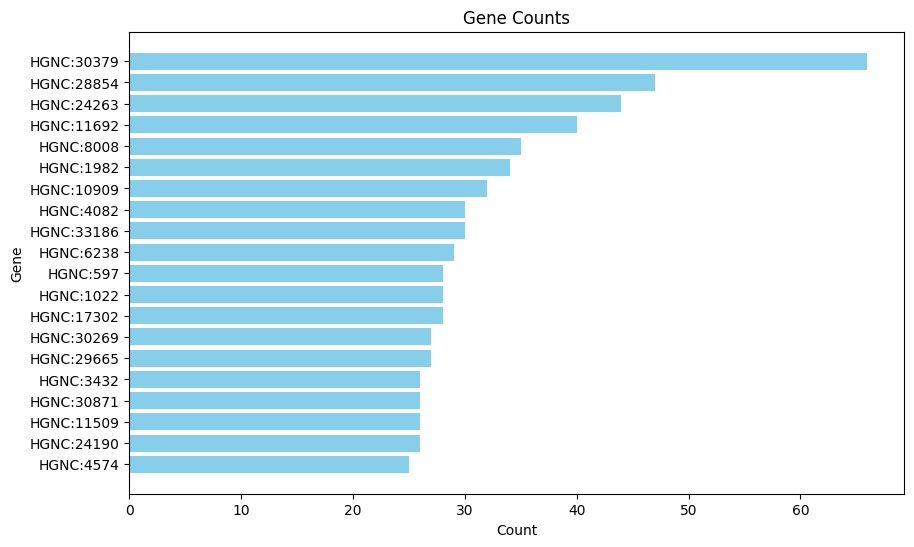

In [22]:
import matplotlib.pyplot as plt

gene_names = []
counts = []

#print("Gene | Count")
#print("-----|------")
for result in results:
    gene = str(result['gene'])
    gene_name = gene.rsplit('/', 1)[-1]  # Extract the last part after '/'
    count = int(result['count'].toPython())
    
    gene_names.append(gene_name)
    counts.append(count)
    #print(f"{gene_name} | {count}")

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(gene_names, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Gene')
plt.title('Gene Counts')
plt.gca().invert_yaxis()  
plt.savefig('genecounts.png')
plt.show()

In [12]:

import rdflib

##filename = "cleaned_maingraph.nt"
g = rdflib.Graph()
#g.parse(filename, format="nt")
count_query2 = """
    PREFIX EDAM: <http://edamontology.org/>
    PREFIX RDF: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX DCT: <http://purl.org/dc/terms/>
    PREFIX BIOLINK: <https://w3id.org/biolink/vocab/>
    PREFIX ENSEMBL: <http://identifiers.org/ensembl/>
    PREFIX NCBIGENE: <http://identifiers.org/ncbigene/>

    SELECT ?subject (SAMPLE(?gene_value) AS ?gene)
    WHERE {
        {
            ?subject ?predicate ?gene_value .
            {
                { ?subject BIOLINK:Gene ?gene_value . }
                OPTIONAL {
                    ?subject BIOLINK:symbol ?gene_value .
                    FILTER NOT EXISTS { ?subject BIOLINK:Gene ?any_gene }
                }
                OPTIONAL {
                    ?subject ENSEMBL:id ?gene_value .
                    FILTER NOT EXISTS { 
                        ?subject BIOLINK:Gene ?any_gene .
                        ?subject BIOLINK:symbol ?any_symbol .
                    }
                }
                OPTIONAL {
                    ?subject NCBIGENE:id ?gene_value .
                    FILTER NOT EXISTS { 
                        ?subject BIOLINK:Gene ?any_gene .
                        ?subject BIOLINK:symbol ?any_symbol .
                        ?subject ENSEMBL:id ?any_ensembl .
                    }
                }
            }
        }
    }
    GROUP BY ?subject
"""

results = g.query(count_query2)
print("Gene | Count")
print("-----|------")
for row in results:
    gene = str(row['gene'])
    count = int(row['count'].toPython()) 
    print(f"{gene} | {count}")
              

Gene | Count
-----|------


2. Query external Monarch Initiative graph using API using these top-cited genes for related phenotypes 

In [25]:
import requests
import pandas as pd
from collections import defaultdict


#def get_gene_id(gene_name):
#    search_url = "https://api-v3.monarchinitiative.org/v3/api/search"
#    params = {
#        "q": gene_name,
#        "category": "biolink:Gene",
#        "limit": 1
#    }
#    try:
#        response = requests.get(search_url, params=params)
#        response.raise_for_status()
#        data = response.json()
#        if data['items']:
#            return data['items'][0]['id']
#    except requests.exceptions.RequestException as e:
#        print(f"An error occurred while searching for {gene_name}: {e}")
#    return None

#getting all associations from monarch api
def get_associations(gene_id, association_type):
    api_url = "https://api-v3.monarchinitiative.org/v3/api/association"
    params = {
        "subject": gene_id,
        "predicate": association_type,
        "offset": 0,
        "limit": 100
    }
    try:
        response = requests.get(api_url, params=params)
        response.raise_for_status()
        data = response.json()
        return data.get('items', [])
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return []

def get_gene_info(gene_name):
    #gene_id = get_gene_id(gene_name)
    #if not gene_id:
    #    print(f"Could not find ID for gene {gene_name}")
    #    return {}
    gene_id = gene_name
    #using predicates to return relevant associations
    phenotypes = get_associations(gene_id, "biolink:has_phenotype")
    diseases = get_associations(gene_id, "biolink:gene_associated_with_condition")
    processes = get_associations(gene_id, "biolink:participates_in")
    functions = get_associations(gene_id, "biolink:enables")
    
    return {
        'Phenotypes': [item.get('object_label', 'Unknown') for item in phenotypes],
        'Diseases': [item.get('object_label', 'Unknown') for item in diseases],
        'Biological Processes': [item.get('object_label', 'Unknown') for item in processes],
        'Molecular Functions': [item.get('object_label', 'Unknown') for item in functions]
    }

results = {}
for gene in gene_names:
    results[gene] = get_gene_info(gene)



In [9]:
print(results)

{'HGNC:30379': {'Phenotypes': [], 'Diseases': [], 'Biological Processes': ['Transport of the SLBP Dependant Mature mRNA', 'Transport of Mature mRNA Derived from an Intronless Transcript', 'Transport of Mature mRNA derived from an Intron-Containing Transcript', 'NS1 Mediated Effects on Host Pathways', 'Viral Messenger RNA Synthesis', 'NEP/NS2 Interacts with the Cellular Export Machinery', 'Regulation of Glucokinase by Glucokinase Regulatory Protein', 'Nuclear import of Rev protein', 'Vpr-mediated nuclear import of PICs', 'snRNP Assembly', 'Separation of Sister Chromatids', 'Resolution of Sister Chromatid Cohesion', 'SUMOylation of DNA damage response and repair proteins', 'SUMOylation of ubiquitinylation proteins', 'Nuclear Pore Complex (NPC) Disassembly', 'Regulation of HSF1-mediated heat shock response', 'SUMOylation of SUMOylation proteins', 'SUMOylation of chromatin organization proteins', 'SUMOylation of RNA binding proteins', 'SUMOylation of DNA replication proteins', 'SUMOylation

In [26]:
shared_associations = defaultdict(lambda: defaultdict(list))

for category in ['Phenotypes', 'Diseases', 'Biological Processes', 'Molecular Functions']:
    all_items = set()
    for gene, data in results.items():
        all_items.update(data.get(category, []))
    
    for item in all_items:
        genes_with_item = [gene for gene, data in results.items() if item in data.get(category, [])]
        if len(genes_with_item) > 1:
            shared_associations[category][item] = genes_with_item

# Print the results
for category, items in shared_associations.items():
    print(f"\n{category}:")
    if items:
        df = pd.DataFrame([(item, ', '.join(genes)) for item, genes in items.items()], 
                          columns=[category, 'Genes'])
        print(df.to_string(index=False))
    else:
        print("No shared associations found.")

# Print unique associations for each gene
print("\nUnique associations for each gene:")
for gene, data in results.items():
    print(f"\n{gene}:")
    for category, items in data.items():
        unique_items = [item for item in items if len(shared_associations[category].get(item, [])) <= 1]
        if unique_items:
            print(f"  {category}:")
            for item in unique_items:
                print(f"    - {item}")


Phenotypes:
                    Phenotypes                                                   Genes
             Sleep disturbance                                   HGNC:3432, HGNC:11509
       Intellectual disability                                    HGNC:4082, HGNC:4574
          Feeding difficulties             HGNC:8008, HGNC:4082, HGNC:11509, HGNC:4574
                 Absent speech                        HGNC:4082, HGNC:11509, HGNC:4574
         Generalized hypotonia                                    HGNC:8008, HGNC:4082
         Involuntary movements                                   HGNC:4082, HGNC:11509
                       Fatigue                                   HGNC:10909, HGNC:3432
                  Microcephaly                                    HGNC:4082, HGNC:4574
              Hyperventilation                                   HGNC:8008, HGNC:11509
    Global developmental delay                        HGNC:4082, HGNC:11509, HGNC:4574
                        Chorea

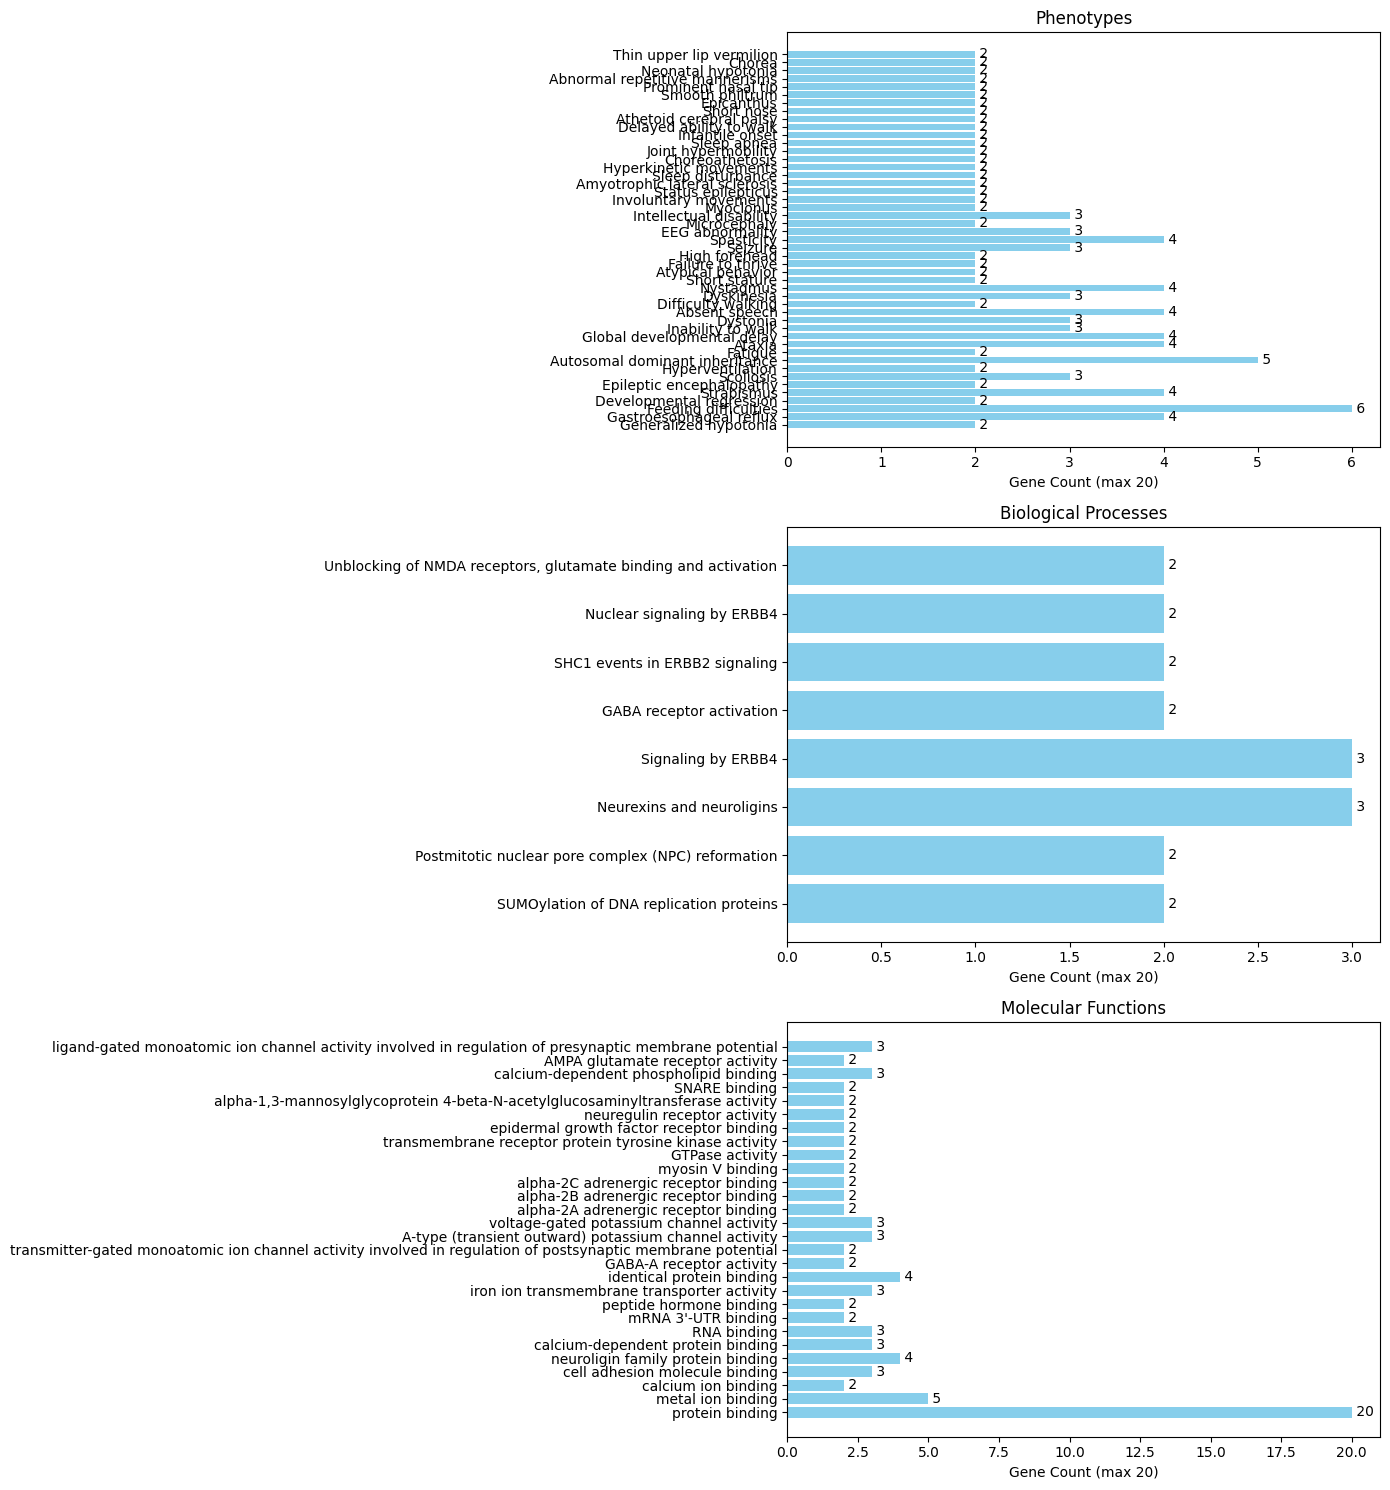

In [28]:
item_occurrences = defaultdict(int)
for gene, data in results.items():
    for category, items in data.items():
        for item in items:
            item_occurrences[item] += 1

# Filter items that are found in more than one gene
filtered_items = {item for item, count in item_occurrences.items() if count > 1}

# Initialize data structure for counts
categories = ['Phenotypes', 'Biological Processes', 'Molecular Functions']
category_counts = {category: defaultdict(int) for category in categories}

# Count occurrences of each filtered item for each category
for gene, data in results.items():
    for category, items in data.items():
        if category in categories:
            for item in items:
                if item in filtered_items:
                    category_counts[category][item] += 1

# Limit counts to a maximum of 20
for category, items in category_counts.items():
    for item in items:
        category_counts[category][item] = min(category_counts[category][item], 20)

# Prepare data for plotting
plt.figure(figsize=(14, 15))

# Plot each category in a separate subplot
for i, category in enumerate(categories):
    plt.subplot(len(categories), 1, i + 1)
    
    items = list(category_counts[category].keys())
    counts = list(category_counts[category].values())
    
    y_pos = range(len(items))
    
    plt.barh(y_pos, counts, color='skyblue')
    plt.xlabel('Gene Count (max 20)')
    plt.title(category)
    plt.yticks(y_pos, items)
    
    # Annotate bars with labels
    for j, count in enumerate(counts):
        plt.text(count, j, f' {count}', va='center', ha='left')

plt.tight_layout()
plt.show()